Importing relevant libraries

In [153]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from statistics import mean
import scipy.stats as stats
import statistics

Set constants (denoted with capitals)

In [2]:
SRC_PATH = 'src'
DATA_PATH = 'HSPG_hypothesis_one/20240224_HSPGdata'
SAVE_PATH = 'output/test'
FILENAME_PREFIX = "20240224_HSPGfunctiontest_"

create output directory if one does not exist


In [3]:
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

List CSV files in my directory

In [4]:
data_files = [f for f in os.listdir(DATA_PATH) if f.endswith('.csv')]
n_data_files = len(data_files)

thetas = []
timeseries = []
list.sort(data_files)
print(data_files)

['20240224_HSPGfunctiontest_HSPGdecay=0.0.csv', '20240224_HSPGfunctiontest_HSPGdecay=0.1.csv', '20240224_HSPGfunctiontest_HSPGdecay=0.5.csv', '20240224_HSPGfunctiontest_HSPGdecay=0.9.csv', '20240224_HSPGfunctiontest_HSPGdecay=1.0.csv']


Read in my data files (longer proces)

In [5]:
for file in data_files:
    df = pd.read_csv(f"{DATA_PATH}/{file}", sep=" ", header=None,
                     names=["time_step", "molecule", "state", "x", "y", "species_id"])
    uq = df["time_step"].unique()
    print(f"{file} -> {len(uq)}")

20240224_HSPGfunctiontest_HSPGdecay=0.0.csv -> 1801
20240224_HSPGfunctiontest_HSPGdecay=0.1.csv -> 1801
20240224_HSPGfunctiontest_HSPGdecay=0.5.csv -> 1801
20240224_HSPGfunctiontest_HSPGdecay=0.9.csv -> 1801
20240224_HSPGfunctiontest_HSPGdecay=1.0.csv -> 1801


In [6]:

data_df = pd.read_csv(f"{DATA_PATH}/20240224_HSPG"
                      f"functiontest_HSPGdecay=1.0.csv", sep=" ", header=None, names=["time_step", "molecule", "state", "x", "y", "species_id"])
df_HFRR = data_df[data_df["molecule"] == 16]
df_HFRR.tail(50)


,time_step,molecule,state,x,y,species_id
30130730,1801,16,3,68.59070,5.00000,226621
30130738,1801,16,3,2.96890,5.00000,226683
30130745,1801,16,3,3.64522,5.00000,226780
30130746,1801,16,3,19.34990,5.00000,226781
30130749,1801,16,3,52.02690,5.00000,226782
30130755,1801,16,3,79.35070,5.00000,229712
30130760,1801,16,3,78.76210,5.00000,226919
30130778,1801,16,3,73.82980,5.00000,227584
30130840,1801,16,3,91.63880,5.00000,227587
30130864,1801,16,3,28.24000,5.00000,229747


Assign molecule dictionary

In [7]:
molecules = {
    1: "vesicle_F",
    2: "vesicle_F_top",
    3: "vesicle_R",
    4: "vesicle_R_top",
    5: "vesicle_H",
    6: "vesicle_H_top",
    7: "fused_vesicle_F",
    8: "fused_vesicle_R",
    9: "fused_vesicle_H",
    10: "F",
    11: "H",
    12: "R",
    13: "RR",
    14: "FH",
    15: "FHRR",
    16: "FRR",
    17: "F_species",
    18: "H_species",
    19: "R_species",
    20: "F-membrane-bound"

}

ALL MY FUNCTIONS

In [29]:
def get_counts(df, time_step):
    filtered = df[df["time_step"] == time_step]
    counts = filtered["molecule"].value_counts().to_dict()
    for k in molecules.keys():
        if not k in counts:
            counts[k] = 0.0
    return counts

def get_counts_df(df):
    time_steps = df["time_step"].unique().tolist()
    rows = [get_counts(df, t) for t in time_steps]
    return pd.DataFrame.from_dict(rows)

def top_counts(df, time_step):
    top_df = df[df["y"] >= 15]
    top_df.reset_index(drop=True, inplace=True)
    filtered = top_df[top_df["time_step"] == time_step]
    top_counts = filtered["molecule"].value_counts().to_dict()
    for k in molecules.keys():
        if not k in top_counts:
            top_counts[k] = 0.0
    return top_counts

def get_top_counts(df):
    top_df = df[df["y"] >= 15]
    top_df.reset_index(drop=True, inplace=True)
    time_steps = top_df["time_step"].unique().tolist()
    rows = [get_counts(top_df, t) for t in time_steps]
    return pd.DataFrame.from_dict(rows)

def bottom_counts(df, time_step):
    bottom_df = df[df["y"] <= 5]
    bottom_df.reset_index(drop=True, inplace=True)
    filtered = bottom_df[bottom_df["time_step"] == time_step]
    bottom_counts = filtered["molecule"].value_counts().to_dict()
    for k in molecules.keys():
        if not k in bottom_counts:
            bottom_counts[k] = 0.0
    return bottom_counts

def get_bottom_counts(df):
    bottom_df = df[df["y"] <= 5]
    bottom_df.reset_index(drop=True, inplace=True)
    time_steps = bottom_df["time_step"].unique().tolist()
    rows = [get_counts(bottom_df, t) for t in time_steps]
    return pd.DataFrame.from_dict(rows)

def top_signal_transduction(df):
    top_df = df[df["y"] >= 15]
    top_df_HFRR = top_df[top_df["molecule"] == 15]
    top_result_df = top_df_HFRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    top_result_df['signal transduction time'] = top_result_df['max'] - top_result_df['min']
    # return top_result_df[['species_id', 'signal transduction time']]
    return top_result_df

def bottom_signal_transduction(df):
    bottom_df = df[df["y"] <= 5]
    bottom_df_HFRR = bottom_df[bottom_df["molecule"] == 15]
    bottom_result_df = bottom_df_HFRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    bottom_result_df['signal transduction time'] = bottom_result_df['max'] - bottom_result_df['min']
    return bottom_result_df


def HFRR_signal_transduction(df):
    df_HFRR = df[df["molecule"] == 15]
    result_df = df_HFRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    result_df['signal transduction time'] = result_df['max'] - result_df['min']
    return result_df

def FRR_signal_transduction(df):
    df_FRR = df[df["molecule"] == 16]
    result_df = df_FRR.groupby('species_id')['time_step'].agg(['min', 'max'])
    result_df['signal transduction time'] = result_df['max'] - result_df['min']
    return result_df

def get_theta(file_name):
    theta = data_file.split('=')[1].split('.csv')[0]
    return float(theta)

Processing for transduction time analysis

In [9]:
transduction_dfs = []

for data_file in data_files:
    print(f"[INFO] Processing {data_file}")
    data_df = pd.read_csv(f"{DATA_PATH}/{data_file}", sep=" ", header=None, names=["time_step", "molecule", "state", "x", "y", "species_id"])

    FHRR_transduction_df = total_signal_transduction(data_df)
    FRR_transduction_df = FRR_signal_transduction(data_df)
    label = data_file.replace(FILENAME_PREFIX, "")
    label = label.replace(".csv", "")
    transduction_dfs.append((FHRR_transduction_df, FRR_transduction_df, label))

print("[INFO] DONE!")

[INFO] Processing 20240224_HSPGfunctiontest_HSPGdecay=0.0.csv
[INFO] Processing 20240224_HSPGfunctiontest_HSPGdecay=0.1.csv
[INFO] Processing 20240224_HSPGfunctiontest_HSPGdecay=0.5.csv
[INFO] Processing 20240224_HSPGfunctiontest_HSPGdecay=0.9.csv
[INFO] Processing 20240224_HSPGfunctiontest_HSPGdecay=1.0.csv
[INFO] DONE!


Plot signal transduction histograms

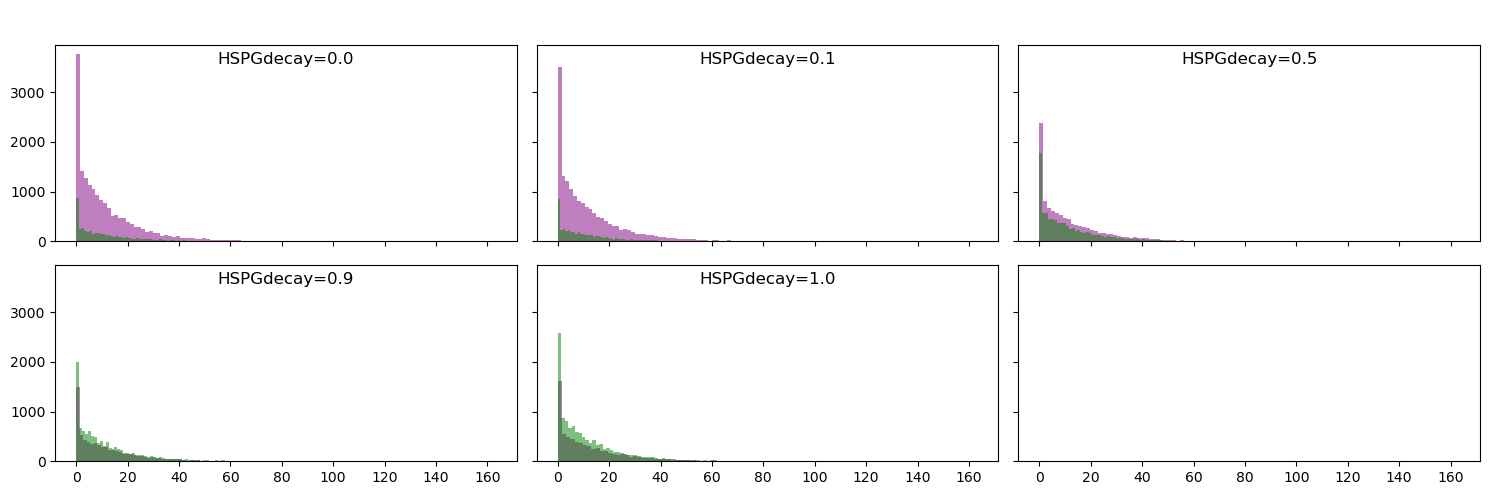

In [10]:
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, sharey=True, sharex=True, figsize=(15, 5))
plt.style.use('dark_background')
cmap = plt.colormaps['Purples']
colors = cmap(np.linspace(0.5,1,8))

for (n, (FHRR_df, FRR_df, label)) in enumerate(transduction_dfs):
    col_num = n % n_cols
    row_num = int(math.floor(n / n_cols))
    axes[row_num, col_num].hist(FHRR_df['signal transduction time']/10, bins=100, label=label, color="Purple", alpha=0.5)
    axes[row_num, col_num].hist(FRR_df['signal transduction time']/10, bins=100, label=label, color="Green", alpha=0.5)
    axes[row_num, col_num].set_title(label, y=1.0, pad=-14)
fig.suptitle("Signal transduction")
plt.tight_layout()
plt.savefig('HSPG_histograms.png')
plt.show()

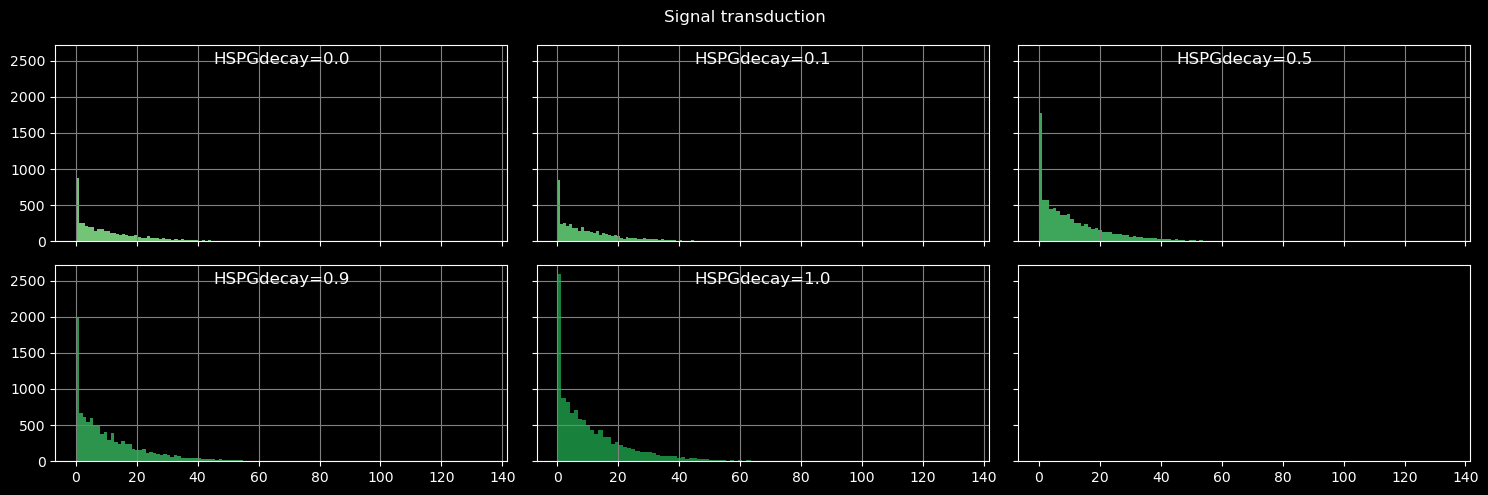

In [13]:
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, sharey=True, sharex=True, figsize=(15, 5))
plt.style.use('dark_background')
cmap = plt.colormaps['Greens']
colors = cmap(np.linspace(0.5,1,8))

for (n, (FHRR_df, FRR_df, label)) in enumerate(transduction_dfs):
    col_num = n % n_cols
    row_num = int(math.floor(n / n_cols))
    axes[row_num, col_num].hist(FRR_df['signal transduction time']/10, bins=100, label=label, color=colors[n])
    axes[row_num, col_num].set_title(label, y=1.0, pad=-14)
    axes[row_num, col_num].grid(color="grey")
fig.suptitle("Signal transduction")
plt.tight_layout()
plt.savefig('HSPG_histograms.png')
plt.show()

Processing for single dataset transduction time analysis

In [15]:
signal_transduction_data = pd.read_csv(f"{DATA_PATH}/{data_files[0]}", sep=" ", header=None, names=["time_step", "molecule", "state", "x", "y", "species_id"])
FRR_result_df = FRR_signal_transduction(signal_transduction_data)
FHRR_result_df = total_signal_transduction(signal_transduction_data)


Plot single dataset transduction time

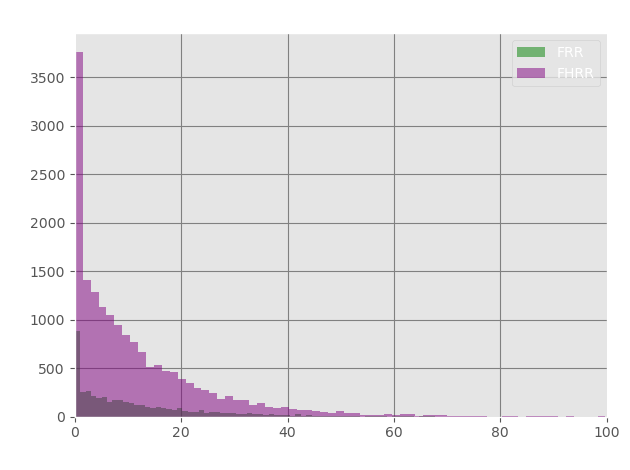

In [17]:
%matplotlib inline
plt.style.use('ggplot')
plt.hist(FRR_result_df['signal transduction time']/10, bins=100, label="FRR", color=("Green"), alpha=0.5)
plt.hist(FHRR_result_df['signal transduction time']/10, bins=100, label="FHRR", alpha = 0.5, color=("Purple"))
plt.xlabel("Signal transduction time (s)")
plt.grid(color='grey')
plt.ylabel("Frequency")
plt.xlim(0,100)
plt.title("Signal transduction")
plt.legend()
plt.tight_layout()
#plt.savefig("HSPG=0.001_histogram.png")
plt.show()

In [89]:
signal_transduction_data = pd.read_csv(f"{DATA_PATH}/{data_files[2]}", sep=" ", header=None, names=["time_step", "molecule", "state", "x", "y", "species_id"])
FRR_result_df = FRR_signal_transduction(signal_transduction_data)
FHRR_result_df = total_signal_transduction(signal_transduction_data)
print(data_files[2])

20240224_HSPGfunctiontest_HSPGdecay=0.5.csv


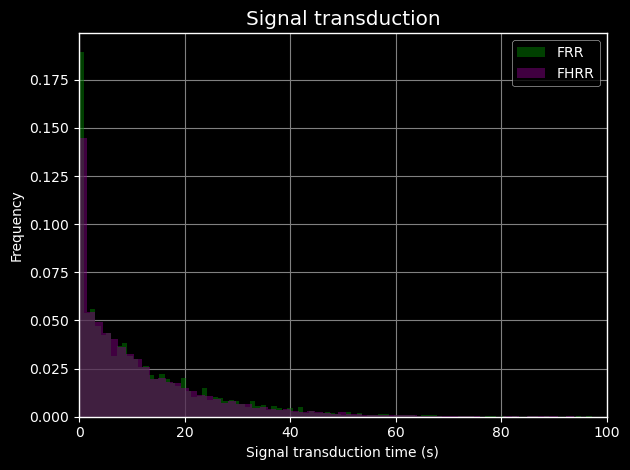

In [18]:
%matplotlib inline
plt.style.use('dark_background')
plt.hist(FRR_result_df['signal transduction time']/10, bins=100, label="FRR", color=("Green"), density=True, alpha=0.5)
plt.hist(FHRR_result_df['signal transduction time']/10, bins=100, label="FHRR", alpha = 0.5, color=("Purple"), density=True)
plt.xlabel("Signal transduction time (s)")
plt.grid(color='grey')
plt.ylabel("Frequency")
plt.xlim(0,100)
plt.title("Signal transduction")
plt.legend()
plt.tight_layout()
#plt.savefig("HSPG=0.001_histogram.png")
plt.show()

Processing molecule counts (long step)

In [30]:
plots = []

for data_file in data_files:
    print(f"[INFO] Processing {data_file}")
    data_df = pd.read_csv(f"{DATA_PATH}/{data_file}", sep=" ", header=None, names=["time_step", "molecule", "state", "x", "y", "species_id"])
    data_counts = get_counts_df(data_df)
    cell1_counts = get_top_counts(data_df)
    cell2_counts = get_bottom_counts(data_df)
    theta = get_theta(data_df)

    label = data_file.replace(FILENAME_PREFIX, "")
    label = label.replace(".csv", "")
    plots.append((data_df["time_step"].unique() / 10, data_counts, label, cell1_counts, cell2_counts, theta))

print("[INFO] DONE!")

[INFO] Processing 20240224_HSPGfunctiontest_HSPGdecay=0.0.csv
[INFO] Processing 20240224_HSPGfunctiontest_HSPGdecay=0.1.csv
[INFO] Processing 20240224_HSPGfunctiontest_HSPGdecay=0.5.csv
[INFO] Processing 20240224_HSPGfunctiontest_HSPGdecay=0.9.csv
[INFO] Processing 20240224_HSPGfunctiontest_HSPGdecay=1.0.csv
[INFO] DONE!



Processing thetas

In [20]:
thetas = []
for i in range(len(data_files)):
    theta = data_files[i].split('=')[1].split('.csv')[0]
    thetas.append(float(theta))

print(thetas)

[0.0, 0.1, 0.5, 0.9, 1.0]


Plot HFRR counts for each condition 

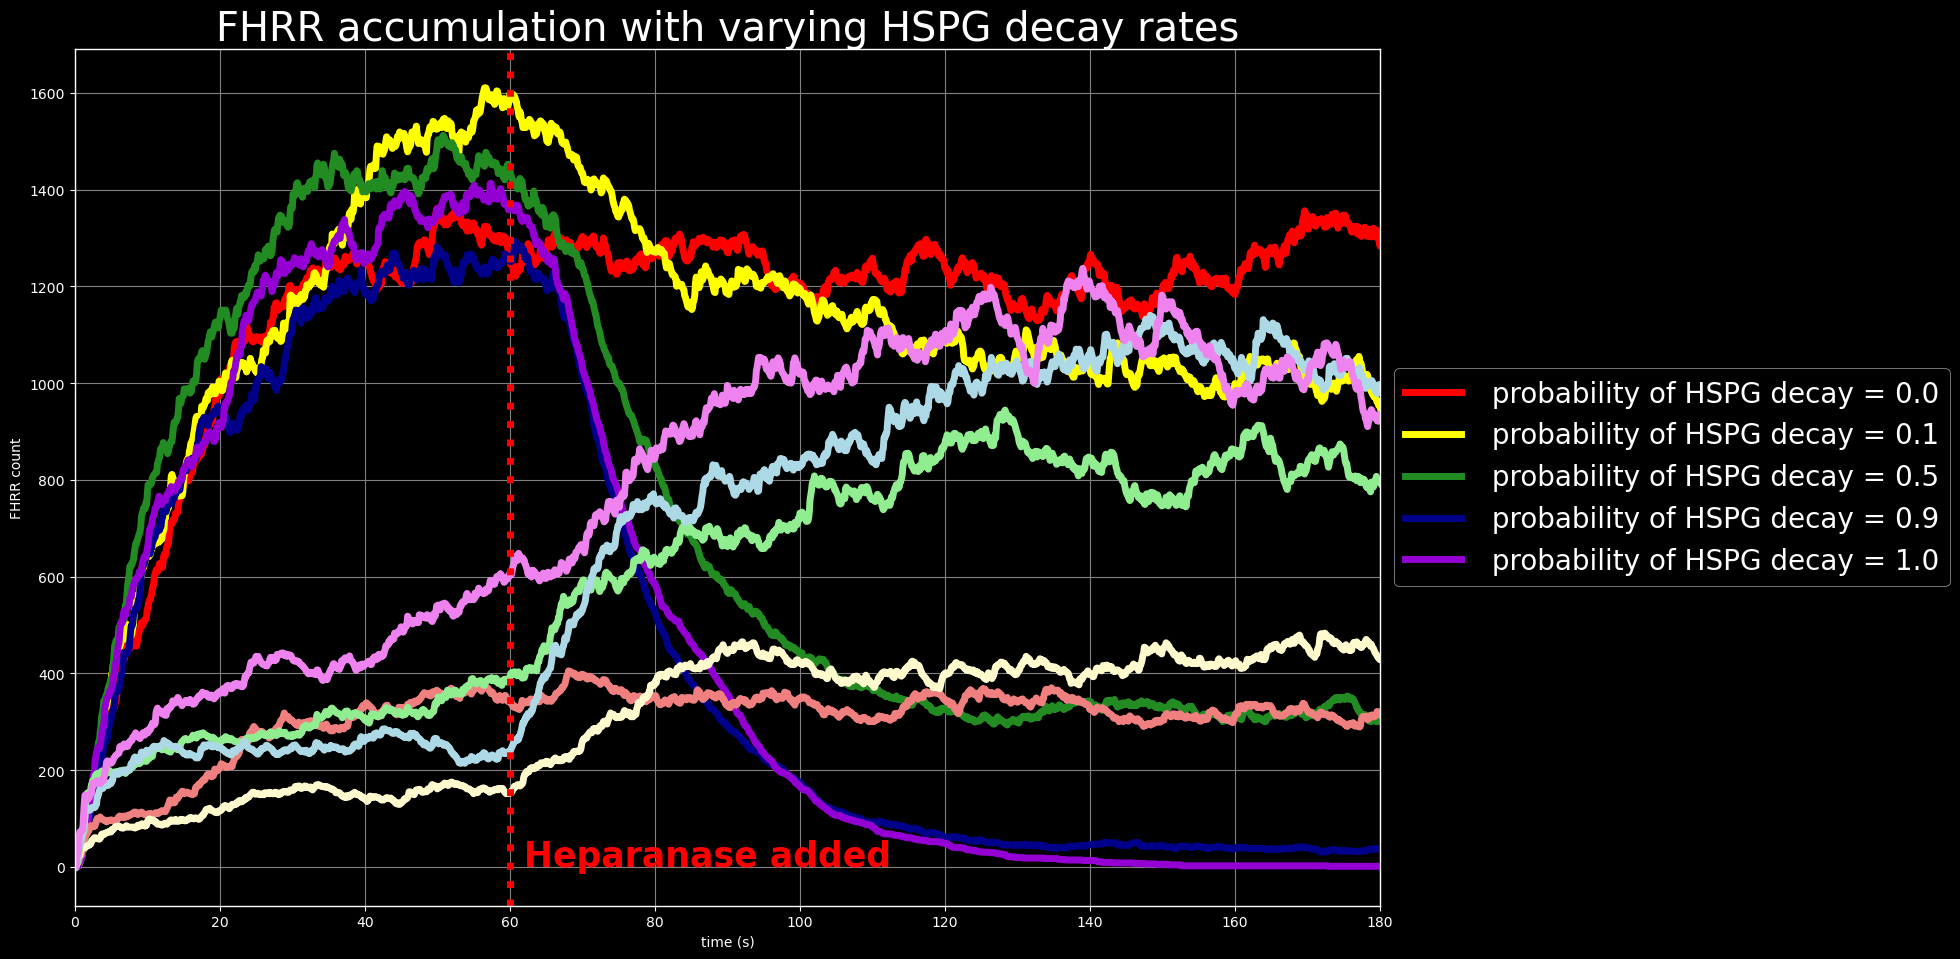

In [21]:
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.style.use('dark_background')
# to_plot = [16, 17, 18]
#cmap = plt.colormaps['red', 'yellow', 'forestgreen', 'darkblue', 'darkviolet']
colors = ('red', 'yellow', 'forestgreen', 'darkblue', 'darkviolet')

molecule = 15

for (n, (time_step, data_counts, label, cell1_counts, cell2_counts)) in enumerate(plots):
    plt.plot(time_step, data_counts[molecule], color=colors[n], label=label.replace("HSPGdecay=", " probability of HSPG decay = "), linewidth=5)

molecule = 16
#cmap = plt.colormaps['lightcoral', 'lemonchiffon', 'lightgreen', 'lightblue', 'violet']
colors = ('lightcoral', 'lemonchiffon', 'lightgreen', 'lightblue', 'violet')
for (n, (time_step, data_counts, label, cell1_counts, cell2_counts)) in enumerate(plots):
    plt.plot(time_step, data_counts[molecule], color=colors[n], linewidth=5)

plt.rcParams.update({'font.size': 20})
plt.xlabel("time (s)")
plt.ylabel(f"FHRR count")
plt.xlim(0, 180)

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("FHRR accumulation with varying HSPG decay rates")
plt.tight_layout()
plt.axvline(x=60, color='red', linestyle=':', linewidth=5)
plt.text(62, 2, 'Heparanase added', color='red', fontsize=25, fontweight='bold')
plt.grid(color='grey')
plt.savefig("FHRR_different_HSPGdecay.png")
plt.show()

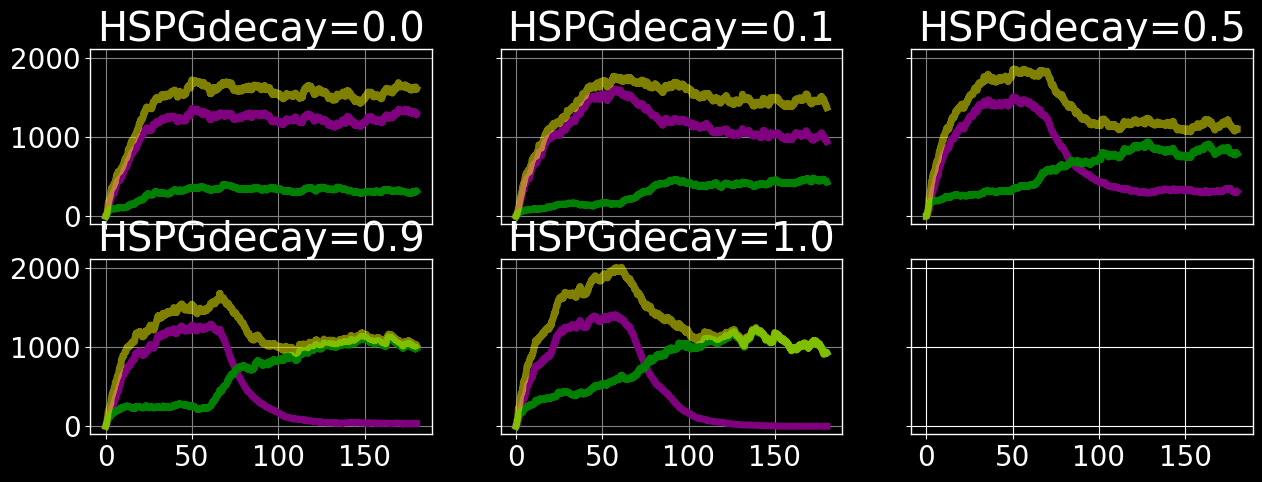

In [22]:
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, sharey=True, sharex=True, figsize=(15, 5))
plt.style.use('dark_background')
cmap = plt.colormaps['Purples']
colors = cmap(np.linspace(0.5,1,8))

for (n, (time_step, data_counts, label, cell1_counts, cell2_counts)) in enumerate(plots):
    col_num = n % n_cols
    row_num = int(math.floor(n / n_cols))
    axes[row_num, col_num].plot(time_step, data_counts[15], color="Purple", linewidth=5)
    axes[row_num, col_num].plot(time_step, data_counts[16], color="Green", linewidth=5)
    axes[row_num, col_num].plot(time_step, data_counts[15]+data_counts[16], color="Yellow", linewidth=5, alpha=0.5)
    label = label.replace("20240224_HSPGfunctiontest_", "")
    axes[row_num, col_num].set_title(label, y=1.0)
    
    axes[row_num, col_num].grid(color="grey")



Text(0, 0.5, 'total signal transduced ')

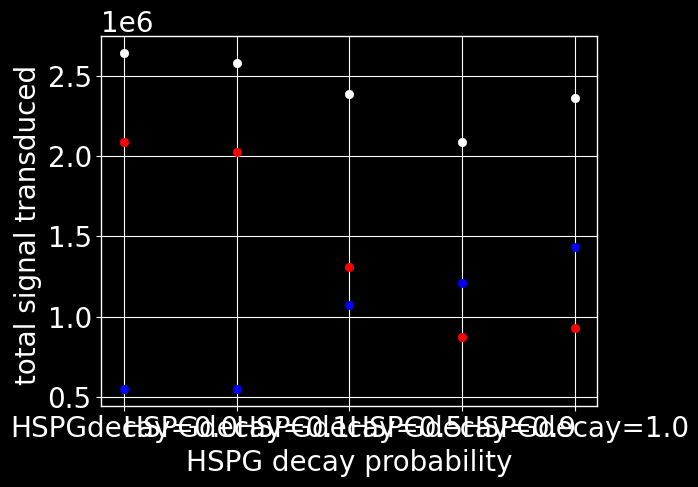

In [23]:
y = []
x = []
z = []
w = []

for (n, (time_step, data_counts, label, cell1_counts, cell2_counts)) in enumerate(plots):
    total_signal = sum(data_counts[15] + data_counts[16])
    FHRR_signal = sum(data_counts[15])
    FRR_signal = sum(data_counts[16])
    y.append(total_signal)
    label = label.replace("20240224_HSPGfunctiontest_HSPGdecay=", "")
    x.append(label)
    z.append(FHRR_signal)
    w.append(FRR_signal)
    
plt.scatter(x, y, color="white")
plt.scatter(x, z, color="red")
plt.scatter(x, w, color="blue")
plt.xlabel("HSPG decay probability")
plt.ylabel("total signal transduced ")

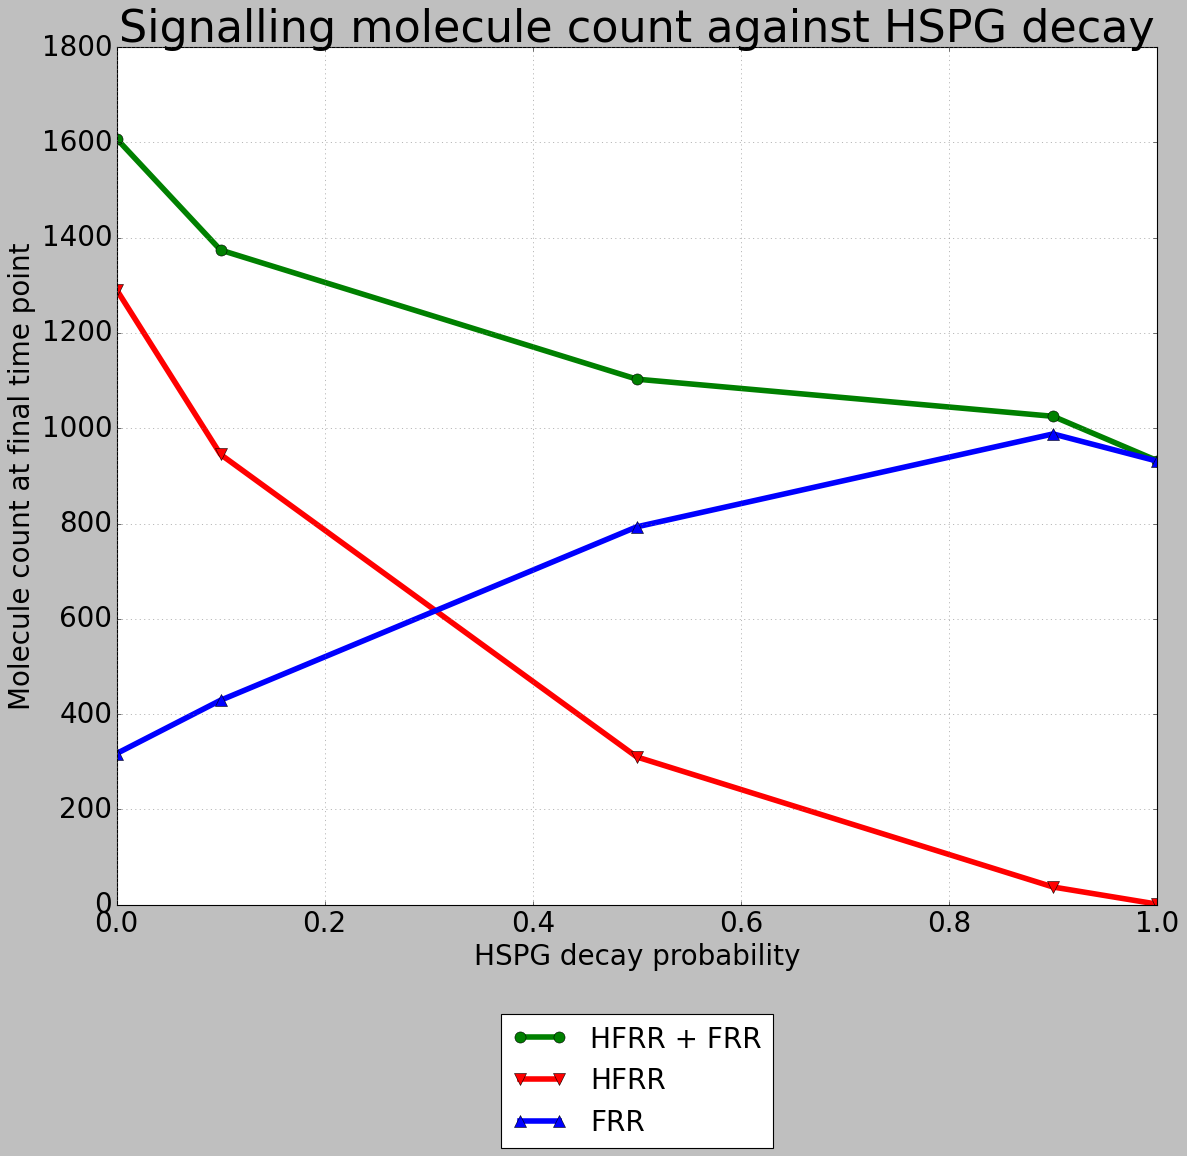

In [63]:
plt.style.use("classic")
plt.figure(figsize=(15, 15))
y = []
x = []
z = []
w = []
for (n, (time_step, data_counts, label, cell1_counts, cell2_counts, theta)) in enumerate(plots):
    total_signal = sum(data_counts[15][-1:] + data_counts[16][-1:])
    FHRR_signal = sum(data_counts[15][-1:])
    FRR_signal = sum(data_counts[16][-1:])
    y.append(total_signal)
    label = theta
    x.append(label)
    z.append(FHRR_signal)
    w.append(FRR_signal)

plt.plot(x, y, color="green", marker="o", linewidth=5, label="HFRR + FRR", markersize=10)
plt.plot(x, z, color="red", marker="v", linewidth=5, label="HFRR", markersize=10)
plt.plot(x, w, color="blue", marker="^", linewidth=5, label="FRR", markersize=10)
plt.title("Signalling molecule count against HSPG decay", fontsize=40)
plt.xlabel("HSPG decay probability", fontsize=25)
plt.ylabel("Molecule count at final time point", fontsize=25)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(color='grey')
plt.tight_layout()
plt.savefig("molecule_counts_HSPG_decay.png")
plt.show()



Plot top and bottom cell counts for each condition (poor plot)

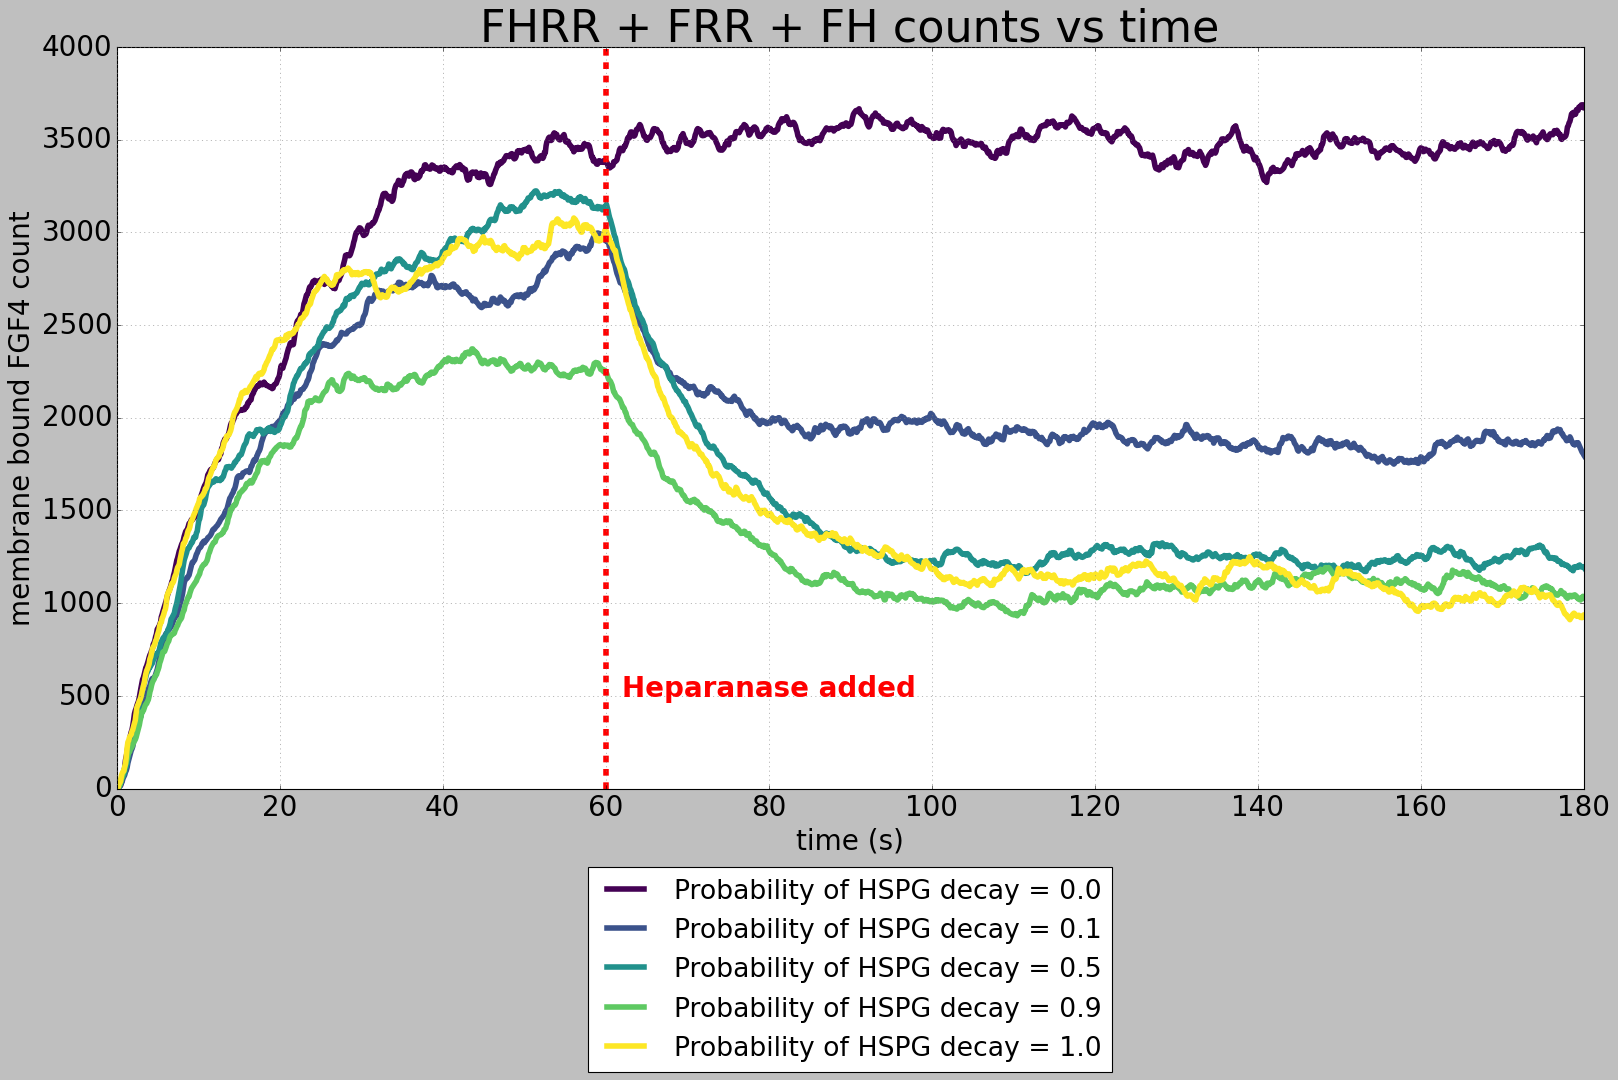

In [144]:
%matplotlib inline
plt.figure(figsize=(20, 15))
plt.style.use('classic')
# to_plot = [16, 17, 18]
cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0,1,5))


for (n, (time_step, data_counts, label, cell1_counts, cell2_counts, theta)) in enumerate(plots):
    plt.plot(time_step, data_counts[14] + data_counts[15] + data_counts [16] , color=colors[n], label = f"Probability of HSPG decay = {theta}", linewidth=5)

plt.rcParams.update({'font.size': 20})
plt.xlabel("time (s)", fontsize=25)
plt.ylabel(f"membrane bound FGF4 count", fontsize=25)
plt.xlim(0, 180)

plt.legend(bbox_to_anchor=(0.5, -0.4), loc="lower center")
plt.title("FHRR + FRR + FH counts vs time", fontsize=40)
plt.tight_layout()
plt.axvline(x=60, color='red', linestyle='dashed', linewidth=5)
plt.text(62, 500, 'Heparanase added', color='red', fontsize=25, fontweight='bold')
plt.grid(color='grey')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("FHRR_different_HSPGdecay.png", bbox_inches ='tight')
plt.show()

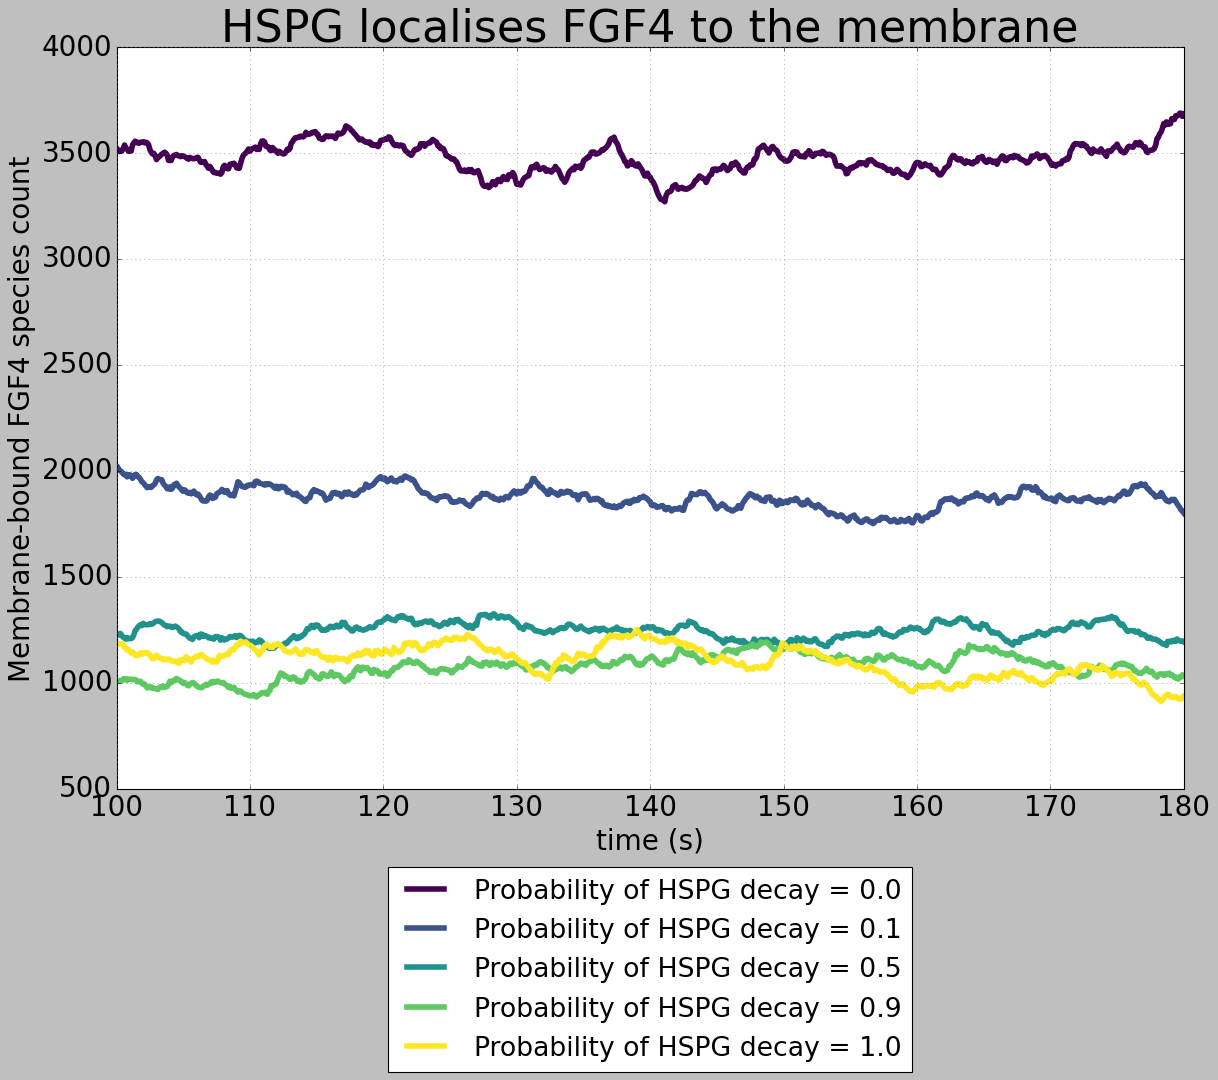

In [145]:
%matplotlib inline
plt.figure(figsize=(15, 15))
plt.style.use('classic')
# to_plot = [16, 17, 18]
cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0,1,5))

START_TIME = 1000

for (n, (time_step, data_counts, label, cell1_counts, cell2_counts, theta)) in enumerate(plots):
    plt.plot(time_step[START_TIME:], data_counts[14][START_TIME:] + data_counts[15][START_TIME:] + data_counts [16][START_TIME:] , color=colors[n], label = f"Probability of HSPG decay = {theta}", linewidth=5)

plt.rcParams.update({'font.size': 20})
plt.xlabel("time (s)", fontsize=25)
plt.ylabel(f"Membrane-bound FGF4 species count", fontsize=25)
plt.xlim(100, 180)

plt.legend(bbox_to_anchor=(0.5, -0.4), loc="lower center")
plt.title("HSPG localises FGF4 to the membrane", fontsize=40)
plt.tight_layout()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.axvline(x=60, color='red', linestyle='dashed', linewidth=5)
#plt.text(62, 2, 'Heparanase added', color='red', fontsize=25, fontweight='bold')
plt.grid(color='grey')
plt.savefig("HFRR-FRR-FH_vs_time.png", bbox_inches ='tight')
plt.show()

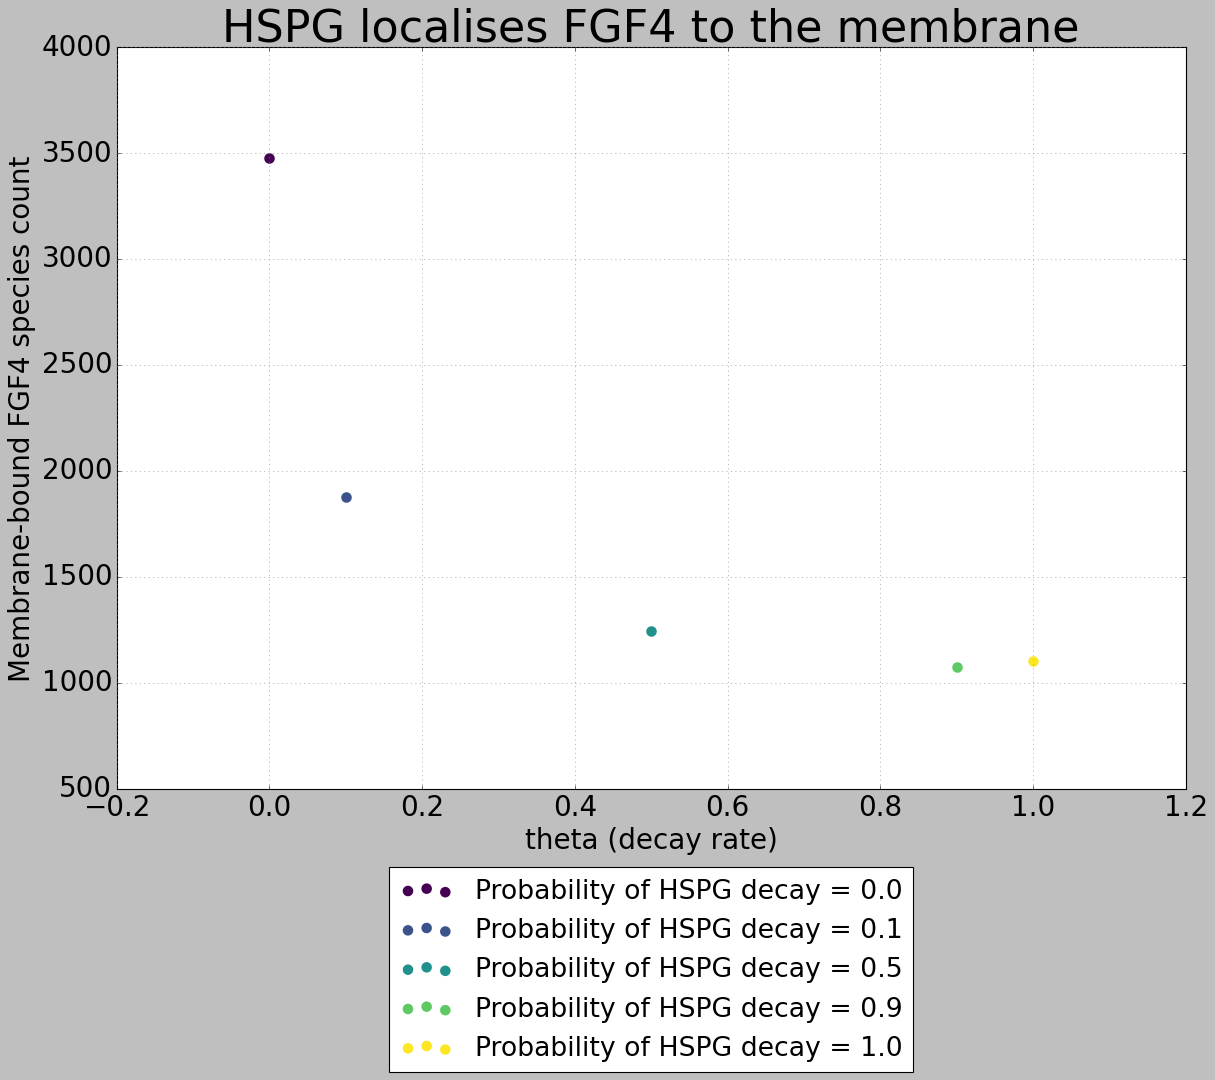

In [159]:
%matplotlib inline
plt.figure(figsize=(15, 15))
plt.style.use('classic')
# to_plot = [16, 17, 18]
cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0,1,5))

START_TIME = 1000

for (n, (time_step, data_counts, label, cell1_counts, cell2_counts, theta)) in enumerate(plots):
    plt.scatter(theta,(statistics.mean(data_counts[14][START_TIME:] + data_counts[15][START_TIME:] + data_counts [16][START_TIME:])), color=colors[n], label = f"Probability of HSPG decay = {theta}", linewidth=5)

plt.rcParams.update({'font.size': 20})
plt.xlabel("theta (decay rate)", fontsize=25)
plt.ylabel(f"Membrane-bound FGF4 species count", fontsize=25)

plt.legend(bbox_to_anchor=(0.5, -0.4), loc="lower center")
plt.title("HSPG localises FGF4 to the membrane", fontsize=40)
plt.tight_layout()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.axvline(x=60, color='red', linestyle='dashed', linewidth=5)
#plt.text(62, 2, 'Heparanase added', color='red', fontsize=25, fontweight='bold')
plt.grid(color='grey')
plt.savefig("HFRR-FRR-HF_vs_HFRR-FRR.png", bbox_inches ='tight')
plt.show()

In [162]:
for (n, (time_step, data_counts, label, cell1_counts, cell2_counts, theta)) in enumerate(plots):
    print(theta)
    print(statistics.mean(data_counts[14][START_TIME:] + data_counts[15][START_TIME:] + data_counts [16][START_TIME:]))
    print(statistics.stdev(data_counts[14][START_TIME:] + data_counts[15][START_TIME:] + data_counts [16][START_TIME:]))

0.0
3475.383270911361
70.28009440650862
0.1
1873.7003745318352
49.977546081811084
0.5
1243.848938826467
36.75759652095745
0.9
1075.732833957553
54.77516346925535
1.0
1102.980024968789
73.68286503997639


In [101]:
stats.pearsonr((data_counts[15][START_TIME:] + data_counts [16][START_TIME:]) , (data_counts[14][START_TIME:] + data_counts[15][START_TIME:] + data_counts [16][START_TIME:]) )

PearsonRResult(statistic=0.9999999999999988, pvalue=0.0)

Pearson correltion of 0.999 anda pvalue of 0.0. This indicates that the two are very highly positively correlated. 

Text(0.5, 0, 'HFRR + FRR counts')

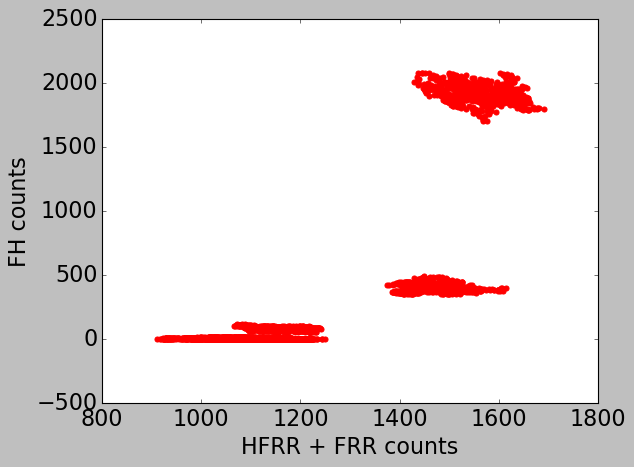

In [136]:
FH = []
HFRR_FRR = []
HFRR_FRR_FH = []

for (n, (time_step, data_counts, label, cell1_counts, cell2_counts, theta)) in enumerate(plots):
    FH.extend(data_counts[14][START_TIME:])
    HFRR_FRR.extend(data_counts[15][START_TIME:] + data_counts[16][START_TIME:])
    HFRR_FRR_FH.extend(data_counts[14][START_TIME:] + data_counts[15][START_TIME:]+ data_counts[16][START_TIME:])

plt.scatter(HFRR_FRR, FH, color="red")
plt.ylabel("FH counts")
plt.xlabel("HFRR + FRR counts")

In [134]:
stats.pearsonr(HFRR_FRR, FH)

PearsonRResult(statistic=0.7990437700684183, pvalue=0.0)

In [138]:
stats.pearsonr(HFRR_FRR, HFRR_FRR_FH)

PearsonRResult(statistic=0.8744794380487282, pvalue=0.0)

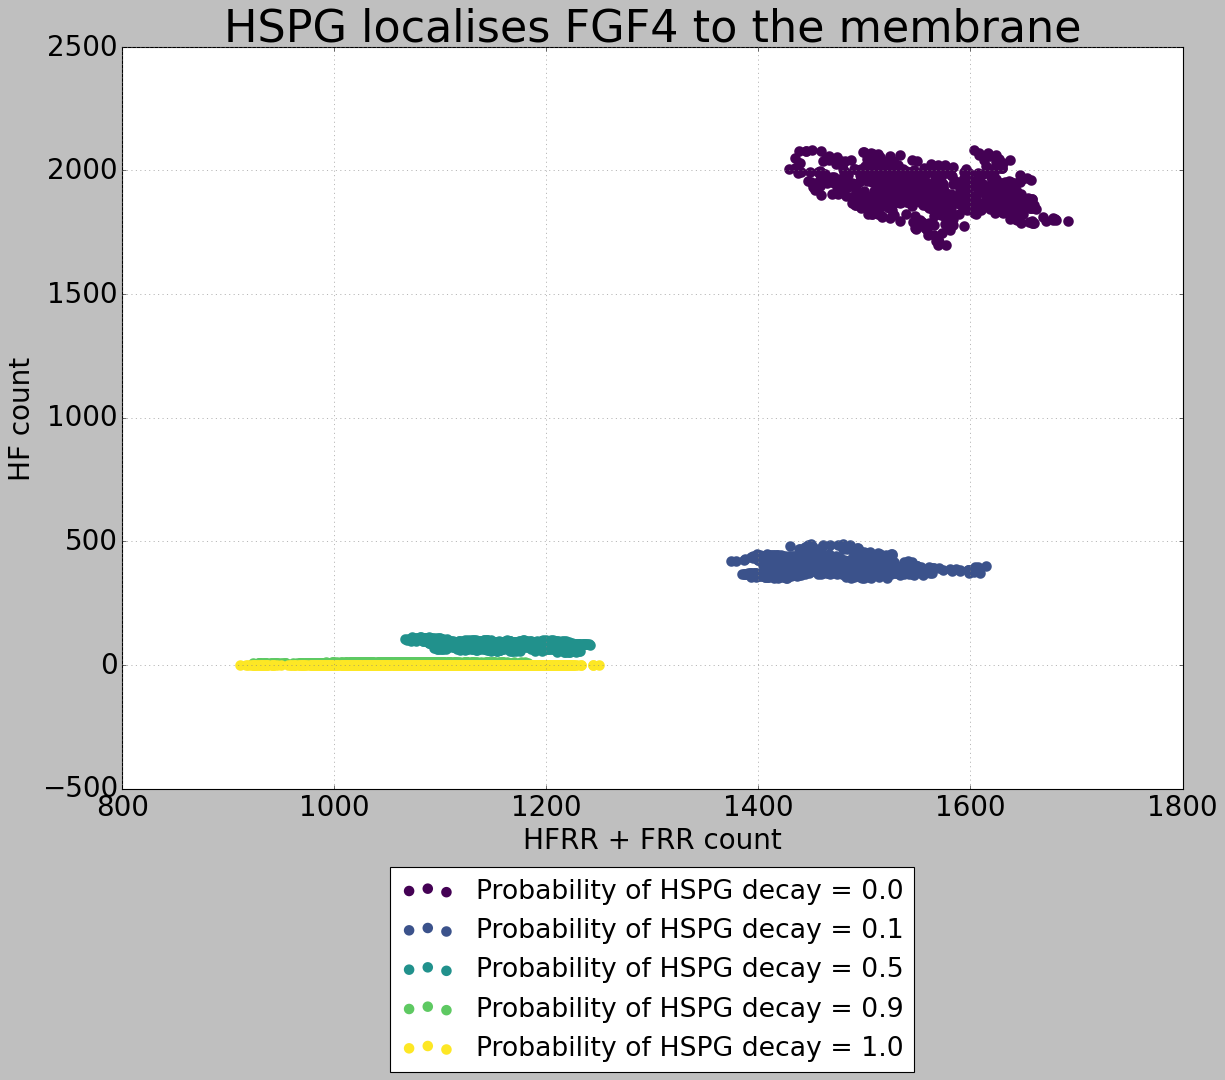

In [148]:
%matplotlib inline
plt.figure(figsize=(15, 15))
plt.style.use('classic')
# to_plot = [16, 17, 18]
cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0,1,5))

START_TIME = 1000

for (n, (time_step, data_counts, label, cell1_counts, cell2_counts, theta)) in enumerate(plots):
    plt.scatter(data_counts[15][START_TIME:] + data_counts [16][START_TIME:] , data_counts[14][START_TIME:], color=colors[n], label = f"Probability of HSPG decay = {theta}", linewidth=5)

plt.rcParams.update({'font.size': 20})
plt.xlabel("HFRR + FRR count", fontsize=25)
plt.ylabel(f"HF count", fontsize=25)

plt.legend(bbox_to_anchor=(0.5, -0.4), loc="lower center")
plt.title("HSPG localises FGF4 to the membrane", fontsize=40)
plt.tight_layout()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.axvline(x=60, color='red', linestyle='dashed', linewidth=5)
#plt.text(62, 2, 'Heparanase added', color='red', fontsize=25, fontweight='bold')
plt.grid(color='grey')
plt.savefig("HF_vs_HFRR-FRR.png", bbox_inches ='tight')
plt.show()

In [116]:
print(data_counts[14])

0       0.0
1       1.0
2       1.0
3       3.0
4       0.0
       ... 
1796    0.0
1797    0.0
1798    0.0
1799    0.0
1800    0.0
Name: 14, Length: 1801, dtype: float64


Plot cell 1 vs cell 2 for single data set

In [ ]:
%%sql


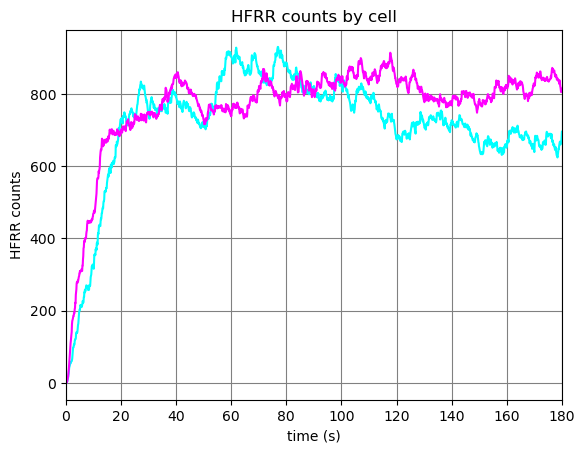

In [12]:
(time_step, data_counts, label, cell1_counts, cell2_counts) = plots[2]
plt.plot(time_step, cell1_counts[15], label=label, color="cyan")
plt.plot(time_step, cell2_counts[15], label=label, color="magenta")
plt.xlabel("time (s)")
plt.ylabel("HFRR counts")
plt.xlim(0, 180)
plt.title("HFRR counts by cell")
plt.grid(color='grey')
plt.show()

Extract theta data 

In [41]:
plt.style.use('dark_background')
x = []
y = []
time_step = 1700
molecule = 15

thetas.sort()
for (n, theta) in enumerate(thetas):
    file_name = f"20240218_HSPGdecay={theta}.csv"
    data_df = pd.read_csv(f"{DATA_PATH}/{file_name}", sep=" ", header=None, names=["time_step", "molecule", "state", "x", "y", "species_id"])
    data_counts = get_counts_df(data_df)
    print(f"[INFO] Processing {theta}")

    time_step_count = data_counts[molecule][time_step]
    x.append(theta)
    y.append(time_step_count)
    print("[INFO] DONE!")

[INFO] Processing 0.001
[INFO] Processing 0.01
[INFO] Processing 0.1
[INFO] Processing 0.25
[INFO] Processing 0.5
[INFO] Processing 0.75
[INFO] Processing 0.9
[INFO] Processing 1.0


Plot phase plot 

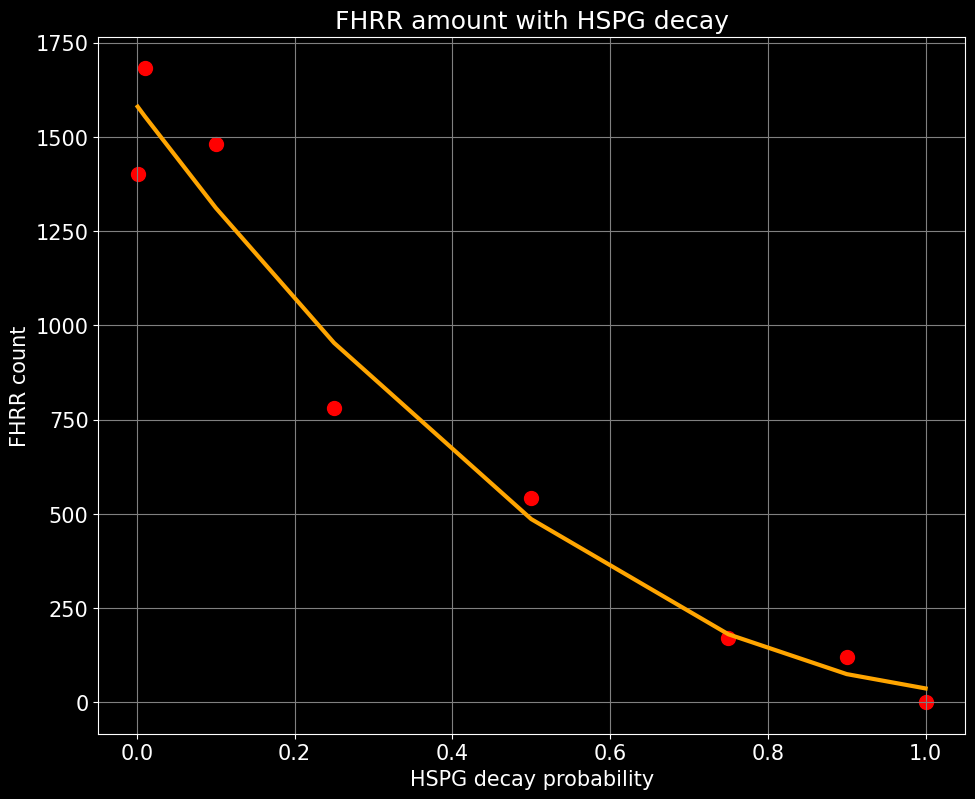

In [43]:
%matplotlib inline

coefficients = np.polyfit(x, y, 2)
curve_fit = np.polyval(coefficients, x)

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(10,8))
plt.scatter(x, y, color="red", s=100)
plt.xlabel("HSPG decay probability")
plt.ylabel("FHRR count")

plt.tight_layout()
plt.plot(x, curve_fit, color="orange", linewidth=3)
plt.title("FHRR amount with HSPG decay")
plt.grid(color='grey')
plt.savefig("HSPG_phaseplot.png")
plt.show()